In [180]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [181]:
df_tracks = pd.read_pickle('tracks_df.pickle')

In [277]:
eng_tracks = load_from_json('lyrics_eng_fin.json')
other_tracks = load_from_json('lyrics_other_fin.json')

In [184]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dprudnikova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [200]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/dprudnikova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dprudnikova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/dprudnikova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# count swear_words

In [194]:
df_tracks.head()

,album_type,album_id,album_name,album_release_data,album_artists_names,album_artists_ids,album_total_tracks,track_artists_names,track_artists_ids,track_name,...,id,uri,track_href,analysis_url,duration_ms,time_signature,playlist_id,genre,total_followers,total_tracks
0,album,6Kssm2LosQ0WyLukFZkEG5,Demi,2013-01-01,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,13,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,Heart Attack,...,1V6gIisPpYqgFeWbMLI0bA,spotify:track:1V6gIisPpYqgFeWbMLI0bA,https://api.spotify.com/v1/tracks/1V6gIisPpYqg...,https://api.spotify.com/v1/audio-analysis/1V6g...,210840,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428
1,single,65L5VcKGKe6sOJIPNFc0Q1,One in a Million,2023-08-04,Bebe Rexha:artist_custom_separator:David Guetta,64M6ah0SkkRsnPGtGiRAbb:artist_custom_separator...,1,Bebe Rexha:artist_custom_separator:David Guetta,64M6ah0SkkRsnPGtGiRAbb:artist_custom_separator...,One in a Million,...,3YfGTvsTAWGC2lgoDOikUz,spotify:track:3YfGTvsTAWGC2lgoDOikUz,https://api.spotify.com/v1/tracks/3YfGTvsTAWGC...,https://api.spotify.com/v1/audio-analysis/3YfG...,160530,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428
2,single,5Q5PomrTdI13qpmEeM393B,On My Love (Sped Up),2023-09-12,Zara Larsson:artist_custom_separator:David Guetta,1Xylc3o4UrD53lo9CvFvVg:artist_custom_separator...,4,Zara Larsson:artist_custom_separator:David Guetta,1Xylc3o4UrD53lo9CvFvVg:artist_custom_separator...,On My Love,...,0K6iKgHPPhAb4Acmg9aD77,spotify:track:0K6iKgHPPhAb4Acmg9aD77,https://api.spotify.com/v1/tracks/0K6iKgHPPhAb...,https://api.spotify.com/v1/audio-analysis/0K6i...,222912,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428
3,album,6fpLLJsDSSAlToEDW2jv4F,Animal (Expanded Edition),2010-01-01,Kesha,6LqNN22kT3074XbTVUrhzX,18,Kesha,6LqNN22kT3074XbTVUrhzX,TiK ToK,...,0HPD5WQqrq7wPWR7P7Dw1i,spotify:track:0HPD5WQqrq7wPWR7P7Dw1i,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428
4,album,20Ol6zZ0nLlc5EGTH1zA0j,Delirium (Deluxe),2015-11-06,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,22,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,"Love Me Like You Do - From ""Fifty Shades Of Grey""",...,3zHq9ouUJQFQRf3cm1rRLu,spotify:track:3zHq9ouUJQFQRf3cm1rRLu,https://api.spotify.com/v1/tracks/3zHq9ouUJQFQ...,https://api.spotify.com/v1/audio-analysis/3zHq...,252534,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428


In [6]:
df_tracks.shape

(145732, 37)

In [8]:
df_tracks.drop_duplicates('id', inplace=True)

In [195]:
df_tracks['lyrics_eng'] = df_tracks['id'].map(lambda x: eng_tracks.get(x, {}).get('lyrics'))
df_tracks['lyrics_other'] = df_tracks['id'].map(lambda x: other_tracks.get(x, {}).get('lyrics'))

In [196]:
eng = df_tracks[~df_tracks['lyrics_eng'].isna()]

In [278]:
other = df_tracks[~df_tracks['lyrics_other'].isna()]

In [275]:
other.shape

(6639, 39)

In [199]:
eng.head()

,album_type,album_id,album_name,album_release_data,album_artists_names,album_artists_ids,album_total_tracks,track_artists_names,track_artists_ids,track_name,...,track_href,analysis_url,duration_ms,time_signature,playlist_id,genre,total_followers,total_tracks,lyrics_eng,lyrics_other
0,album,6Kssm2LosQ0WyLukFZkEG5,Demi,2013-01-01,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,13,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,Heart Attack,...,https://api.spotify.com/v1/tracks/1V6gIisPpYqg...,https://api.spotify.com/v1/audio-analysis/1V6g...,210840,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\nPuttin' my defenses up\n'Cause I don't wanna...,None
1,single,65L5VcKGKe6sOJIPNFc0Q1,One in a Million,2023-08-04,Bebe Rexha:artist_custom_separator:David Guetta,64M6ah0SkkRsnPGtGiRAbb:artist_custom_separator...,1,Bebe Rexha:artist_custom_separator:David Guetta,64M6ah0SkkRsnPGtGiRAbb:artist_custom_separator...,One in a Million,...,https://api.spotify.com/v1/tracks/3YfGTvsTAWGC...,https://api.spotify.com/v1/audio-analysis/3YfG...,160530,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,"\nAh, you're my\n\n\nYou're my one, one, one i...",None
2,single,5Q5PomrTdI13qpmEeM393B,On My Love (Sped Up),2023-09-12,Zara Larsson:artist_custom_separator:David Guetta,1Xylc3o4UrD53lo9CvFvVg:artist_custom_separator...,4,Zara Larsson:artist_custom_separator:David Guetta,1Xylc3o4UrD53lo9CvFvVg:artist_custom_separator...,On My Love,...,https://api.spotify.com/v1/tracks/0K6iKgHPPhAb...,https://api.spotify.com/v1/audio-analysis/0K6i...,222912,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\n(That's on my love)\n(That's on my love)\n\n...,None
3,album,6fpLLJsDSSAlToEDW2jv4F,Animal (Expanded Edition),2010-01-01,Kesha,6LqNN22kT3074XbTVUrhzX,18,Kesha,6LqNN22kT3074XbTVUrhzX,TiK ToK,...,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\nWake up in the morning feelin' like P. Diddy...,None
4,album,20Ol6zZ0nLlc5EGTH1zA0j,Delirium (Deluxe),2015-11-06,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,22,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,"Love Me Like You Do - From ""Fifty Shades Of Grey""",...,https://api.spotify.com/v1/tracks/3zHq9ouUJQFQ...,https://api.spotify.com/v1/audio-analysis/3zHq...,252534,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,"You're the light, you're the night\nYou're the...",None


In [274]:
eng.shape

(44641, 44)

In [226]:
eng['word_count'] = eng['lyrics_eng'].apply(lambda x: len(x.split()))
eng['words_per_second'] = eng['word_count'] / (eng['track_duration_ms'] / 1000)

/tmp/ipykernel_1802220/890441969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['word_count'] = eng['lyrics_eng'].apply(lambda x: len(x.split()))
/tmp/ipykernel_1802220/890441969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['words_per_second'] = eng['word_count'] / (eng['track_duration_ms'] / 1000)


In [227]:
eng.head()

,album_type,album_id,album_name,album_release_data,album_artists_names,album_artists_ids,album_total_tracks,track_artists_names,track_artists_ids,track_name,...,playlist_id,genre,total_followers,total_tracks,lyrics_eng,lyrics_other,unique_words,processed_lyrics,word_count,words_per_second
0,album,6Kssm2LosQ0WyLukFZkEG5,Demi,2013-01-01,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,13,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,Heart Attack,...,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\nPuttin' my defenses up\n'Cause I don't wanna...,None,46,puttin defense wan na fall love ever think hea...,417,1.977803
1,single,65L5VcKGKe6sOJIPNFc0Q1,One in a Million,2023-08-04,Bebe Rexha:artist_custom_separator:David Guetta,64M6ah0SkkRsnPGtGiRAbb:artist_custom_separator...,1,Bebe Rexha:artist_custom_separator:David Guetta,64M6ah0SkkRsnPGtGiRAbb:artist_custom_separator...,One in a Million,...,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,"\nAh, you're my\n\n\nYou're my one, one, one i...",None,43,ah one one one million like someone picked out...,276,1.719316
2,single,5Q5PomrTdI13qpmEeM393B,On My Love (Sped Up),2023-09-12,Zara Larsson:artist_custom_separator:David Guetta,1Xylc3o4UrD53lo9CvFvVg:artist_custom_separator...,4,Zara Larsson:artist_custom_separator:David Guetta,1Xylc3o4UrD53lo9CvFvVg:artist_custom_separator...,On My Love,...,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\n(That's on my love)\n(That's on my love)\n\n...,None,40,love love need time make mind yeah yeah love y...,366,1.641911
3,album,6fpLLJsDSSAlToEDW2jv4F,Animal (Expanded Edition),2010-01-01,Kesha,6LqNN22kT3074XbTVUrhzX,18,Kesha,6LqNN22kT3074XbTVUrhzX,TiK ToK,...,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\nWake up in the morning feelin' like P. Diddy...,None,48,wake morning feelin like diddy hey girl grab g...,478,2.393674
4,album,20Ol6zZ0nLlc5EGTH1zA0j,Delirium (Deluxe),2015-11-06,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,22,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,"Love Me Like You Do - From ""Fifty Shades Of Grey""",...,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,"You're the light, you're the night\nYou're the...",None,45,light night colour blood cure pain thing wan n...,346,1.370113


In [308]:
genre_words = eng.groupby('genre')[['word_count', 'words_per_second']].agg({'word_count':'median', 'words_per_second':'median'}).reset_index()

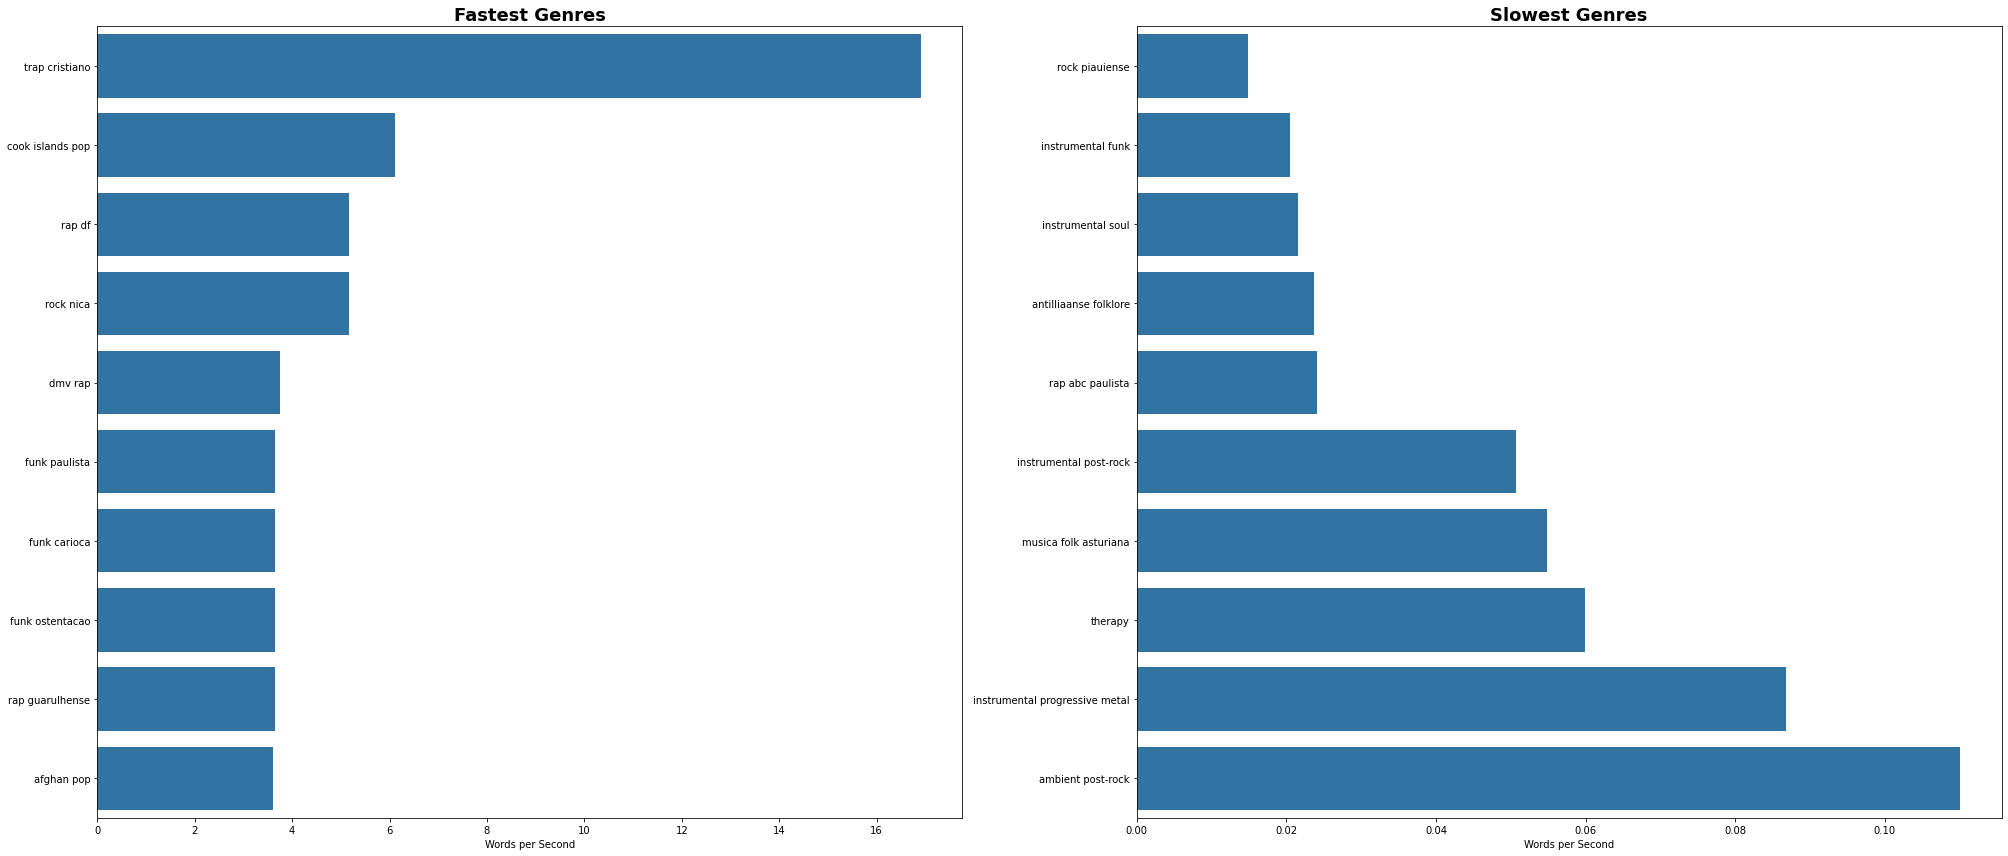

In [311]:
slowest_genres = genre_words.sort_values(by='words_per_second', ascending=True).head(10).sort_values('words_per_second', ascending=True)
fastest_genres = genre_words.sort_values(by='words_per_second', ascending=False).head(10)
most_words_genres = genre_words.sort_values(by='word_count', ascending=False).head(10)
least_words_genres = genre_words.sort_values(by='word_count', ascending=True).head(10)
fig, axs = plt.subplots(1, 2, figsize=(28, 12))

sns.barplot(data=fastest_genres, x='words_per_second', y='genre', ax=axs[0])
axs[0].set_xlabel('Words per Second')
axs[0].set_ylabel('')
axs[0].set_title('Fastest Genres', fontsize=18, fontweight='bold')

sns.barplot(data=slowest_genres, x='words_per_second', y='genre', ax=axs[1])
axs[1].set_xlabel('Words per Second')
axs[1].set_ylabel('')
axs[1].set_title('Slowest Genres', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.savefig('fastest_slowest_eng.png')
plt.show()

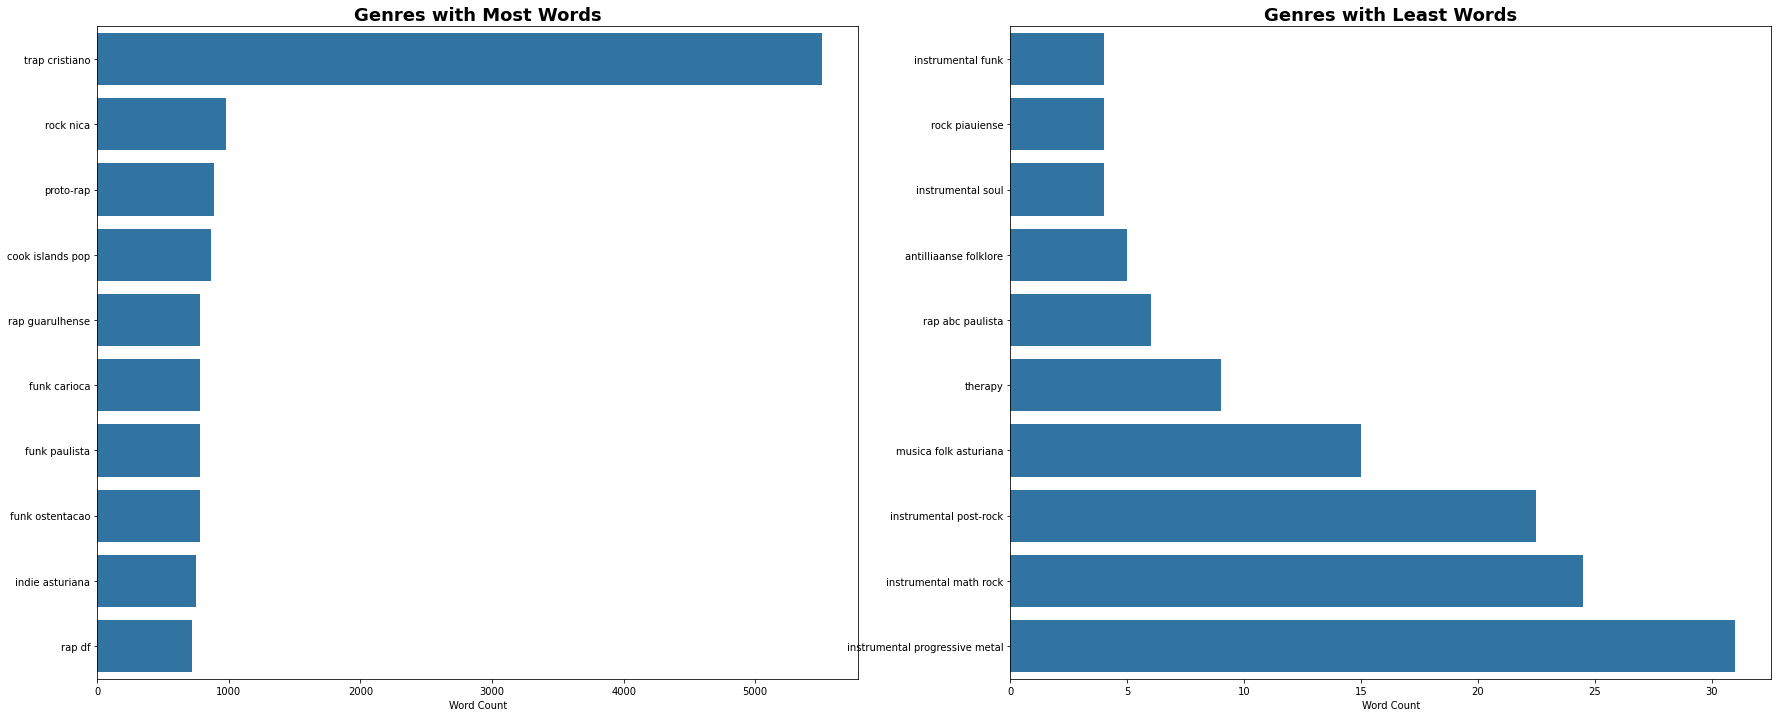

In [312]:
fig2, axs2 = plt.subplots(1, 2, figsize=(30, 12))

sns.barplot(data=most_words_genres, x='word_count', y='genre', ax=axs2[0])
axs2[0].set_xlabel('Word Count')
axs2[0].set_ylabel('')
axs2[0].set_title('Genres with Most Words', fontsize=18, fontweight='bold')

sns.barplot(data=least_words_genres, x='word_count', y='genre', ax=axs2[1])
axs2[1].set_xlabel('Word Count')
axs2[1].set_ylabel('')
axs2[1].set_title('Genres with Least Words', fontsize=18, fontweight='bold')
plt.savefig('most_least_words_eng.png')
plt.show()

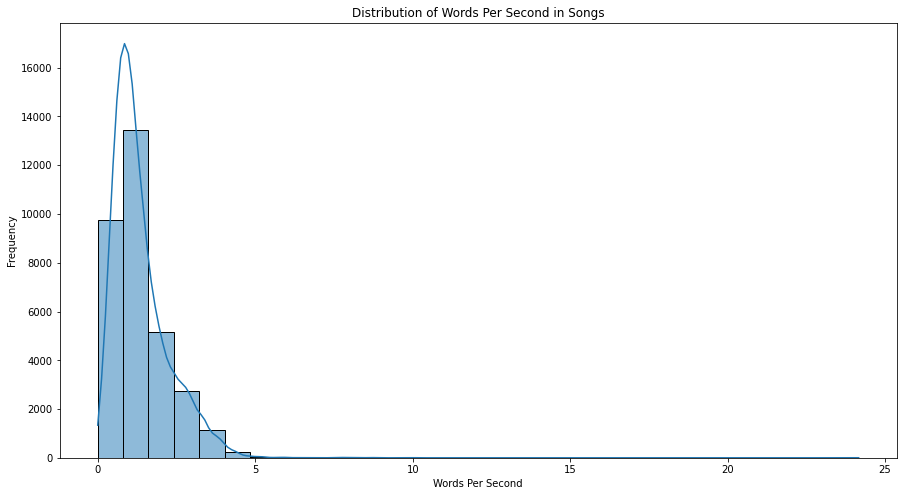

In [315]:
upper_limit = 30
plt.figure(figsize=(15, 8))
sns.histplot(eng[eng['words_per_second'] < upper_limit].drop_duplicates('lyrics_eng')['words_per_second'], bins=30, kde=True)
plt.title('Distribution of Words Per Second in Songs')
plt.xlabel('Words Per Second')
plt.ylabel('Frequency')
plt.savefig('distrib_eng.png')
plt.show()

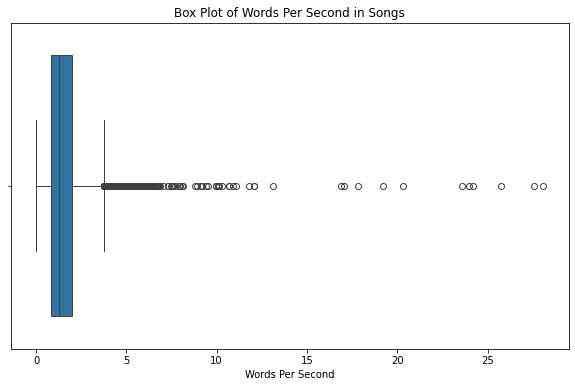

In [151]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=eng[eng['words_per_second']<30]['words_per_second'])
plt.title('Box Plot of Words Per Second in Songs')
plt.xlabel('Words Per Second')
plt.show()

In [255]:
def lexical_diversity(text):
    div = 0 if len(text) == 0 else len(set(text)) / len(text)
    return div

eng['lex_div'] = eng['lyrics_eng'].apply(lexical_diversity)

lex_div_by_genre = eng.groupby('genre')['lex_div'].mean()

/tmp/ipykernel_1802220/2407254211.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['lex_div'] = eng['lyrics_eng'].apply(lexical_diversity)


In [172]:
lex_div_by_genre.sort_values(ascending=False)

genre
instrumental funk        0.664552
antilliaanse folklore    0.571429
rap abc paulista         0.558824
instrumental soul        0.517297
rock piauiense           0.500000
                           ...   
rap guarulhense          0.015887
afghan pop               0.015442
cook islands pop         0.014428
deep soul house          0.012872
rock nica                0.012828
Name: lex_div, Length: 1355, dtype: float64

In [86]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [213]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_tokens)

eng['processed_lyrics'] = eng['lyrics_eng'].apply(preprocess_text)

/tmp/ipykernel_1802220/4119714440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['processed_lyrics'] = eng['lyrics_eng'].apply(preprocess_text)


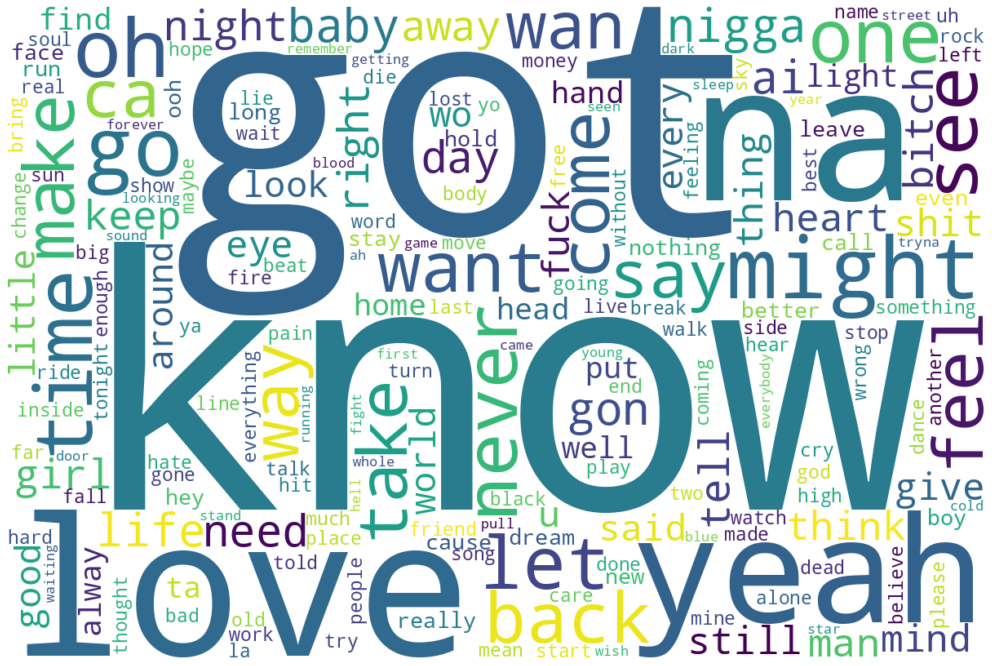

In [313]:
all_words = ' '.join(eng['processed_lyrics'])
wordcloud = WordCloud(width=1200, height=800, background_color='white', collocations=False).generate(all_words)
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud_eng.png')
plt.show()

In [173]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
lyrics_vectorized = vectorizer.fit_transform(eng['lyrics_eng'])

lda = LatentDirichletAllocation(n_components=5)
lda.fit(lyrics_vectorized)

LatentDirichletAllocation(n_components=5)

In [174]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

In [175]:
print_top_words(lda, vectorizer.get_feature_names_out(), 10)

Topic #0: oh love like don know baby ooh want just yeah
Topic #1: like ll away life time ve eyes world come just
Topic #2: hey like girl rock shake party ll little everybody come
Topic #3: don like know just got time ve way say ll
Topic #4: like got yeah ain don bitch fuck shit nigga know


In [207]:
from better_profanity import profanity
profanity.load_censor_words()

### 6. Unique Word Analysis

In [209]:
eng.head()

,album_type,album_id,album_name,album_release_data,album_artists_names,album_artists_ids,album_total_tracks,track_artists_names,track_artists_ids,track_name,...,track_href,analysis_url,duration_ms,time_signature,playlist_id,genre,total_followers,total_tracks,lyrics_eng,lyrics_other
0,album,6Kssm2LosQ0WyLukFZkEG5,Demi,2013-01-01,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,13,Demi Lovato,6S2OmqARrzebs0tKUEyXyp,Heart Attack,...,https://api.spotify.com/v1/tracks/1V6gIisPpYqg...,https://api.spotify.com/v1/audio-analysis/1V6g...,210840,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\nPuttin' my defenses up\n'Cause I don't wanna...,None
1,single,65L5VcKGKe6sOJIPNFc0Q1,One in a Million,2023-08-04,Bebe Rexha:artist_custom_separator:David Guetta,64M6ah0SkkRsnPGtGiRAbb:artist_custom_separator...,1,Bebe Rexha:artist_custom_separator:David Guetta,64M6ah0SkkRsnPGtGiRAbb:artist_custom_separator...,One in a Million,...,https://api.spotify.com/v1/tracks/3YfGTvsTAWGC...,https://api.spotify.com/v1/audio-analysis/3YfG...,160530,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,"\nAh, you're my\n\n\nYou're my one, one, one i...",None
2,single,5Q5PomrTdI13qpmEeM393B,On My Love (Sped Up),2023-09-12,Zara Larsson:artist_custom_separator:David Guetta,1Xylc3o4UrD53lo9CvFvVg:artist_custom_separator...,4,Zara Larsson:artist_custom_separator:David Guetta,1Xylc3o4UrD53lo9CvFvVg:artist_custom_separator...,On My Love,...,https://api.spotify.com/v1/tracks/0K6iKgHPPhAb...,https://api.spotify.com/v1/audio-analysis/0K6i...,222912,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\n(That's on my love)\n(That's on my love)\n\n...,None
3,album,6fpLLJsDSSAlToEDW2jv4F,Animal (Expanded Edition),2010-01-01,Kesha,6LqNN22kT3074XbTVUrhzX,18,Kesha,6LqNN22kT3074XbTVUrhzX,TiK ToK,...,https://api.spotify.com/v1/tracks/0HPD5WQqrq7w...,https://api.spotify.com/v1/audio-analysis/0HPD...,199693,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,\nWake up in the morning feelin' like P. Diddy...,None
4,album,20Ol6zZ0nLlc5EGTH1zA0j,Delirium (Deluxe),2015-11-06,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,22,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,"Love Me Like You Do - From ""Fifty Shades Of Grey""",...,https://api.spotify.com/v1/tracks/3zHq9ouUJQFQ...,https://api.spotify.com/v1/audio-analysis/3zHq...,252534,4,6gS3HhOiI17QNojjPuPzqc,pop,22857.0,428,"You're the light, you're the night\nYou're the...",None


/tmp/ipykernel_1802220/3435925395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng['unique_words'] = eng['lyrics_eng'].apply(lambda x: len(set(x)))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


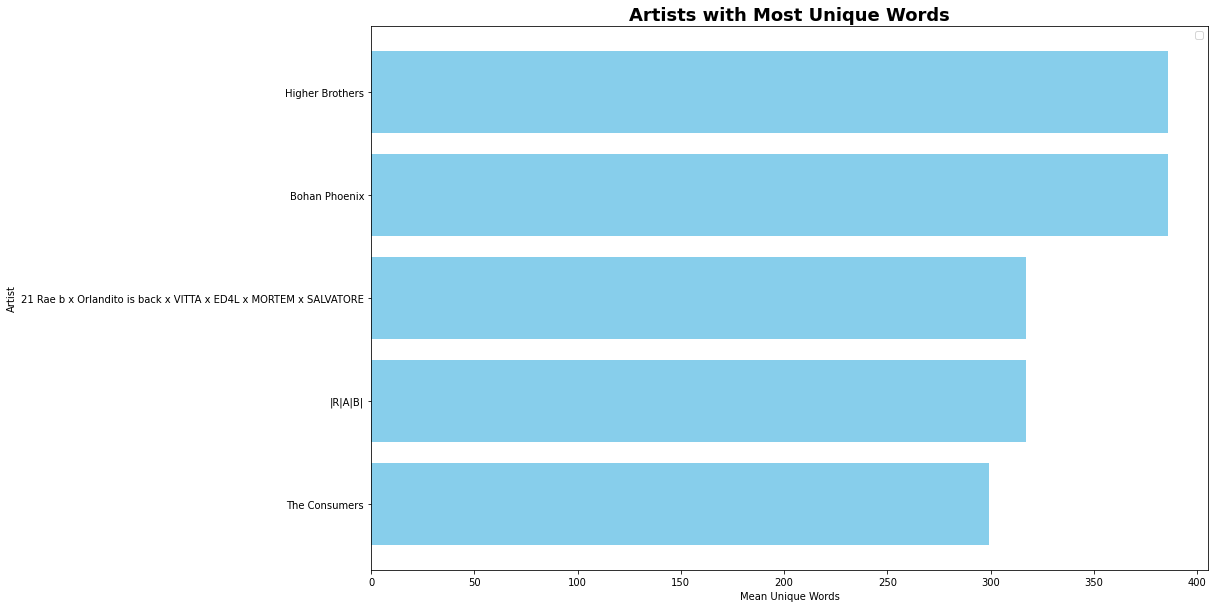

In [316]:
eng['unique_words'] = eng['lyrics_eng'].apply(lambda x: len(set(x)))
eng_exp = eng.copy()
eng_exp['artist'] = eng_exp['track_artists_names'].str.split(':artist_custom_separator:')
eng_exp = eng_exp.explode('artist')

unique_words_by_artist = eng_exp.groupby('artist')['unique_words'].mean()

sorted_unique_words = unique_words_by_artist.sort_values(ascending=False)

plt.figure(figsize=(15, 10))

top_artists = sorted_unique_words.head(5)
plt.barh(top_artists.index, top_artists.values, color='skyblue')

# bottom_artists = sorted_unique_words.head(5)
# plt.barh(bottom_artists.index, bottom_artists.values, color='lightcoral', label='Least Unique Words')

plt.xlabel('Mean Unique Words')
plt.ylabel('Artist')
plt.title('Artists with Most Unique Words', fontsize=18, fontweight='bold')
plt.legend()
plt.gca().invert_yaxis()
plt.savefig('most_unique_eng.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


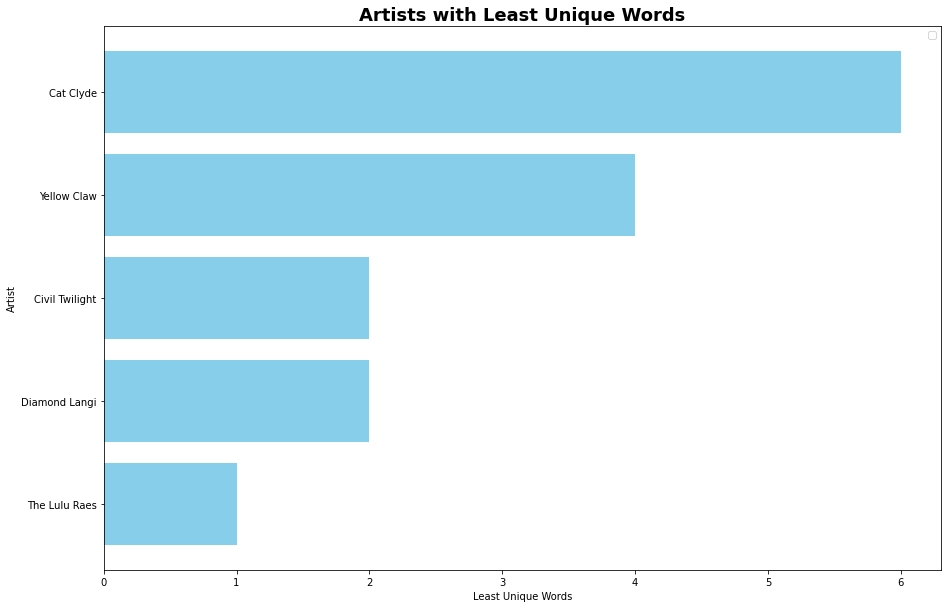

In [317]:
plt.figure(figsize=(15, 10))

bot_artists = sorted_unique_words[sorted_unique_words > 0].tail(5)
plt.barh(bot_artists.index, bot_artists.values, color='skyblue')

plt.xlabel('Least Unique Words')
plt.ylabel('Artist')
plt.title('Artists with Least Unique Words', fontsize=18, fontweight='bold')
plt.legend()
plt.gca().invert_yaxis()
plt.savefig('least_unique_eng.png')
plt.show()

## Треки на другом языке

In [279]:
other.shape

(6639, 39)

In [286]:
other['word_count'] = other['lyrics_other'].apply(lambda x: len(x.split()))
other['words_per_second'] = other['word_count'] / (other['track_duration_ms'] / 1000)

/tmp/ipykernel_1802220/3866526364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['word_count'] = other['lyrics_other'].apply(lambda x: len(x.split()))
/tmp/ipykernel_1802220/3866526364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['words_per_second'] = other['word_count'] / (other['track_duration_ms'] / 1000)


In [287]:
other.tail()

,album_type,album_id,album_name,album_release_data,album_artists_names,album_artists_ids,album_total_tracks,track_artists_names,track_artists_ids,track_name,...,duration_ms,time_signature,playlist_id,genre,total_followers,total_tracks,lyrics_eng,lyrics_other,word_count,words_per_second
144869,album,2WX7ZHfDEOP5AukEl7PQHo,Theatre Of Deception,2012-02-17,Obscurcis Romancia,3VJ42M7AMhxOlBWEn69GKg,8,Obscurcis Romancia,3VJ42M7AMhxOlBWEn69GKg,Sanctuaire Damné,...,392333,3,6U3JRL2usBO9nbexBtxitf,deep symphonic black metal,577.0,90,None,[Je suis allé dans le sanctuaire des damnés\nP...,184,0.468989
144920,single,6aucSx6owNI8qPovt9jcFa,Pardon,2020-07-31,Kanda,5719b9qUDBdyYBqc3pIhBa,1,Kanda,5719b9qUDBdyYBqc3pIhBa,Pardon,...,285962,4,3MUIfb3RPGe0QwBAae3B3R,twee indie pop,310.0,80,None,"[""PARDON K***"" için şarkı sözleri]\n\n\nA-a, p...",280,0.979151
145494,album,4afic5nlacxx0XBUZdfx51,Transponder Down,2005-01-01,Andeline,0d7VLyzxYQegbMbl09y5AP,8,Andeline,0d7VLyzxYQegbMbl09y5AP,The Moment,...,265440,4,61uUE9vhMYIZ7tUMGTrziq,deep power-pop punk,197.0,64,None,[)You might also like,4,0.015069
145623,album,5TOQHz7HcgKSapyzZhNKqo,Profundezas,2018-02-05,Profundezas,3oWGqPIFWwqyQ3k3JJp8Xr,9,Profundezas,3oWGqPIFWwqyQ3k3JJp8Xr,Igreja Que Ilumina,...,164860,4,7ag1VL5wW9kzU3HNakBCNe,metal piauiense,32.0,80,None,[Fogo\nIgreja que ilumina\n\nÉ tão lindo\nMagn...,24,0.145578
145640,single,2Ims6WgqMleFAmjiqr4PEB,Criaturas de Caronte,2017-04-20,Carniçais,2WM0DaP4ZZgN2Pr3E24Qck,5,Carniçais,2WM0DaP4ZZgN2Pr3E24Qck,Nuvens Negras,...,191221,4,7ag1VL5wW9kzU3HNakBCNe,metal piauiense,32.0,80,None,[Nuvens negras\nA força e a fúria tempestiva l...,87,0.454971


In [318]:
genre_words = other.groupby('genre')[['word_count', 'words_per_second']].agg({'word_count':'median', 'words_per_second':'median'}).reset_index()

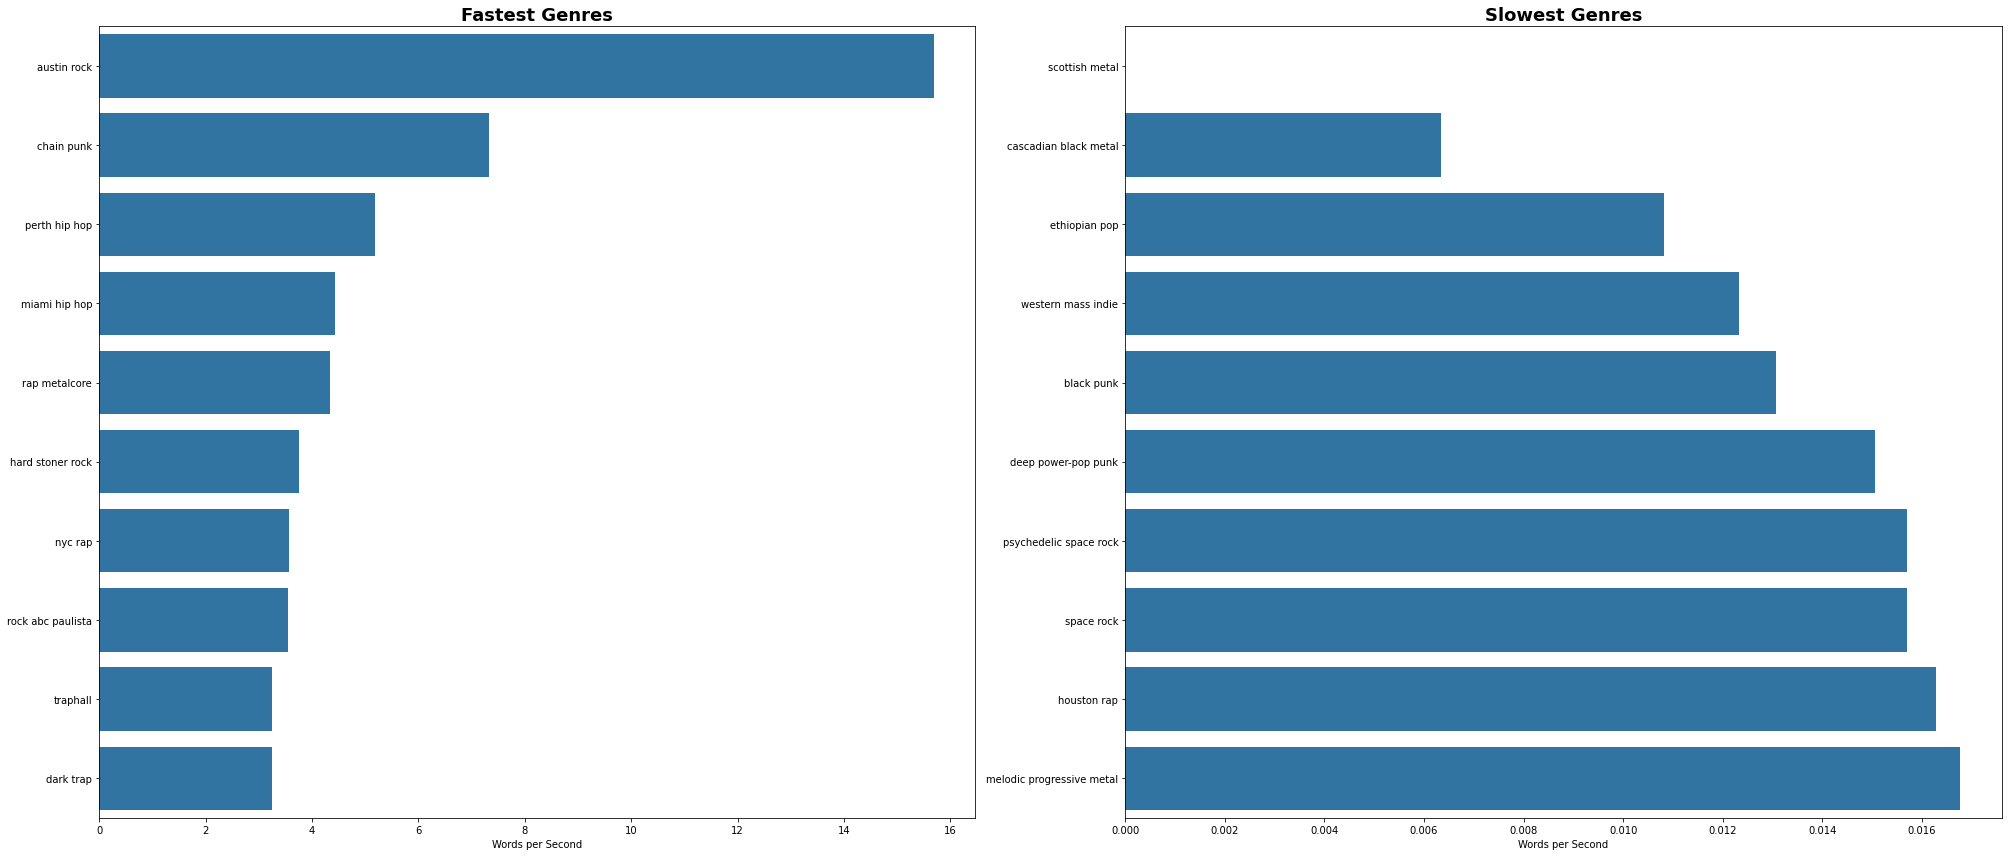

In [319]:
slowest_genres = genre_words.sort_values(by='words_per_second', ascending=True).head(10).sort_values('words_per_second', ascending=True)
fastest_genres = genre_words.sort_values(by='words_per_second', ascending=False).head(10)
most_words_genres = genre_words.sort_values(by='word_count', ascending=False).head(10)
least_words_genres = genre_words.sort_values(by='word_count', ascending=True).head(10)
fig, axs = plt.subplots(1, 2, figsize=(28, 12))

sns.barplot(data=fastest_genres, x='words_per_second', y='genre', ax=axs[0])
axs[0].set_xlabel('Words per Second')
axs[0].set_ylabel('')

axs[0].set_title('Fastest Genres', fontsize=18, fontweight='bold')

sns.barplot(data=slowest_genres, x='words_per_second', y='genre', ax=axs[1])
axs[1].set_xlabel('Words per Second')
axs[1].set_ylabel('')
axs[1].set_title('Slowest Genres', fontsize=18, fontweight='bold')
plt.savefig('fastest_slowest_other.png')
plt.tight_layout()
plt.show()

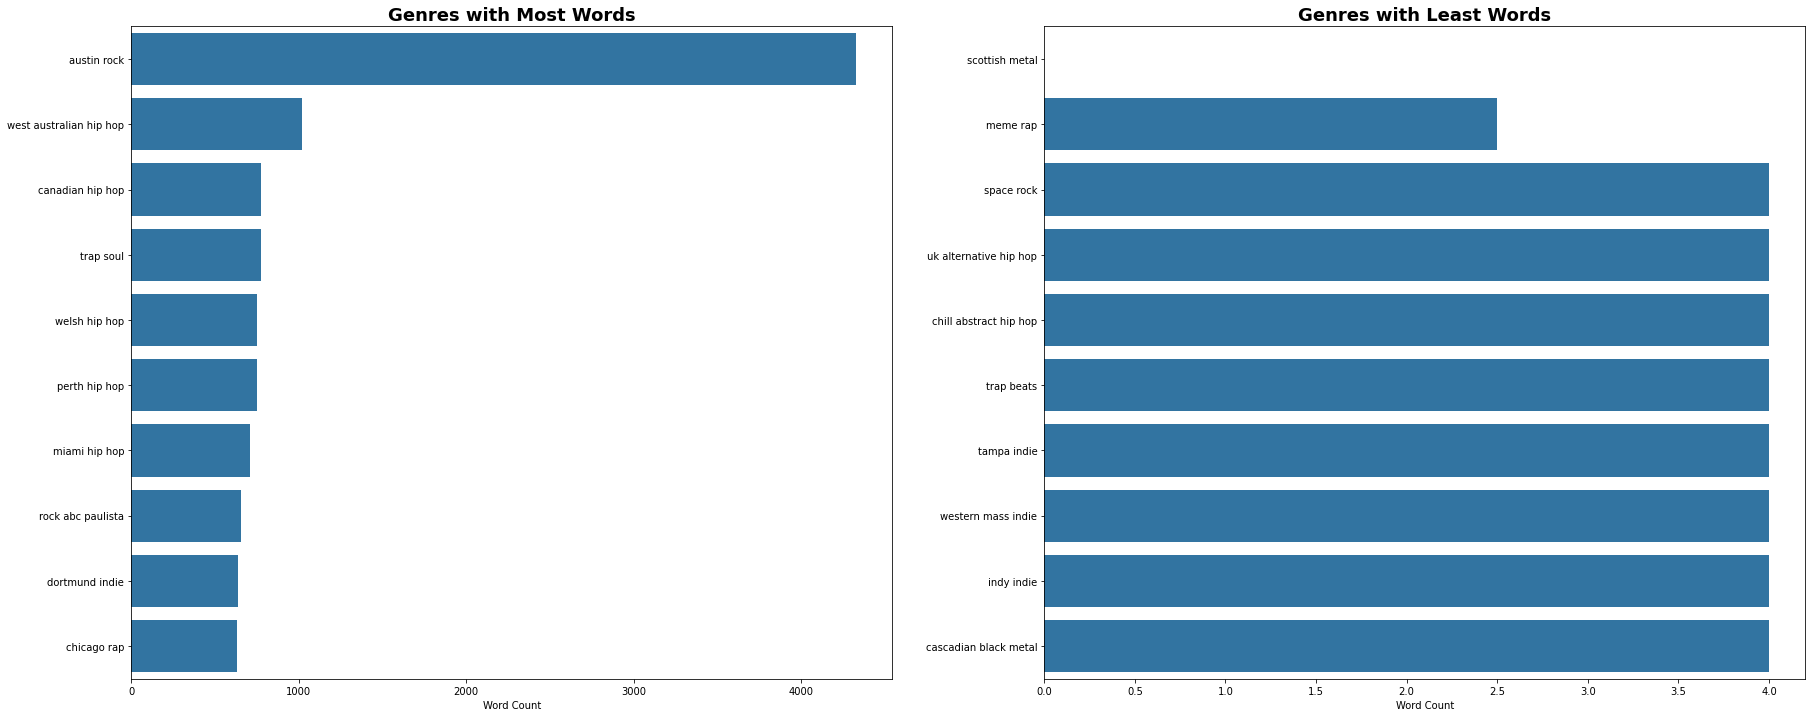

In [320]:
fig2, axs2 = plt.subplots(1, 2, figsize=(30, 12))

sns.barplot(data=most_words_genres, x='word_count', y='genre', ax=axs2[0])
axs2[0].set_xlabel('Word Count')
axs2[0].set_ylabel('')
axs2[0].set_title('Genres with Most Words', fontsize=18, fontweight='bold')

sns.barplot(data=least_words_genres, x='word_count', y='genre', ax=axs2[1])
axs2[1].set_xlabel('Word Count')
axs2[1].set_ylabel('')
axs2[1].set_title('Genres with Least Words', fontsize=18, fontweight='bold')
plt.savefig('most_least_words_other.png')
plt.show()

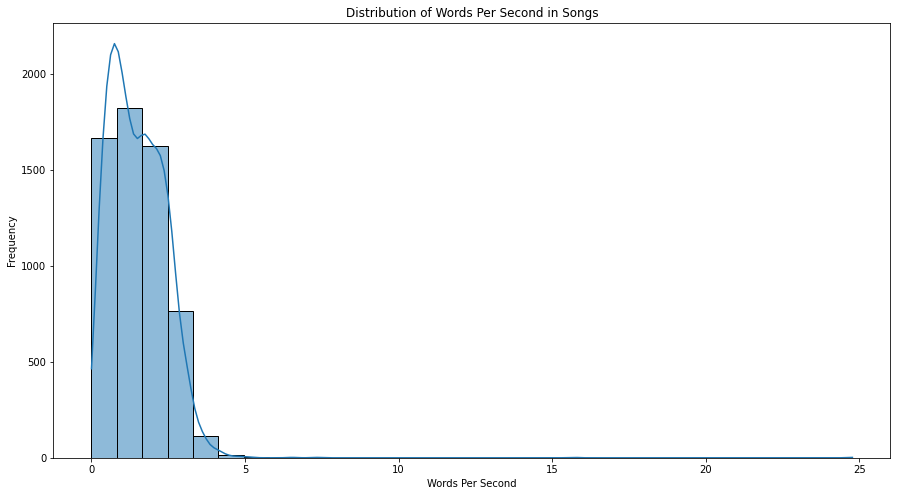

In [321]:
upper_limit = 30
plt.figure(figsize=(15, 8))
sns.histplot(other[other['words_per_second'] < upper_limit].drop_duplicates('lyrics_other')['words_per_second'], bins=30, kde=True)
plt.title('Distribution of Words Per Second in Songs')
plt.xlabel('Words Per Second')
plt.ylabel('Frequency')
plt.savefig('distrib_other.png')
plt.show()

In [297]:
other['lex_div'] = other['lyrics_other'].apply(lexical_diversity)

lex_div_by_genre = other.groupby('genre')['lex_div'].mean()

/tmp/ipykernel_1802220/2045075930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['lex_div'] = other['lyrics_other'].apply(lexical_diversity)


In [298]:
lex_div_by_genre.sort_values(ascending=False)

genre
meme rap                   0.880952
cyberpunk                  0.814815
dreampunk                  0.814815
space rock                 0.772727
indy indie                 0.772727
                             ...   
psychedelic punk           0.014919
nyc rap                    0.013037
west australian hip hop    0.010958
austin rock                0.003288
scottish metal             0.000000
Name: lex_div, Length: 765, dtype: float64

In [322]:
lemmatizer = WordNetLemmatizer()

In [323]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(lemmatized_tokens)

other['processed_lyrics'] = other['lyrics_other'].apply(preprocess_text)

/tmp/ipykernel_1802220/1928170907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['processed_lyrics'] = other['lyrics_other'].apply(preprocess_text)


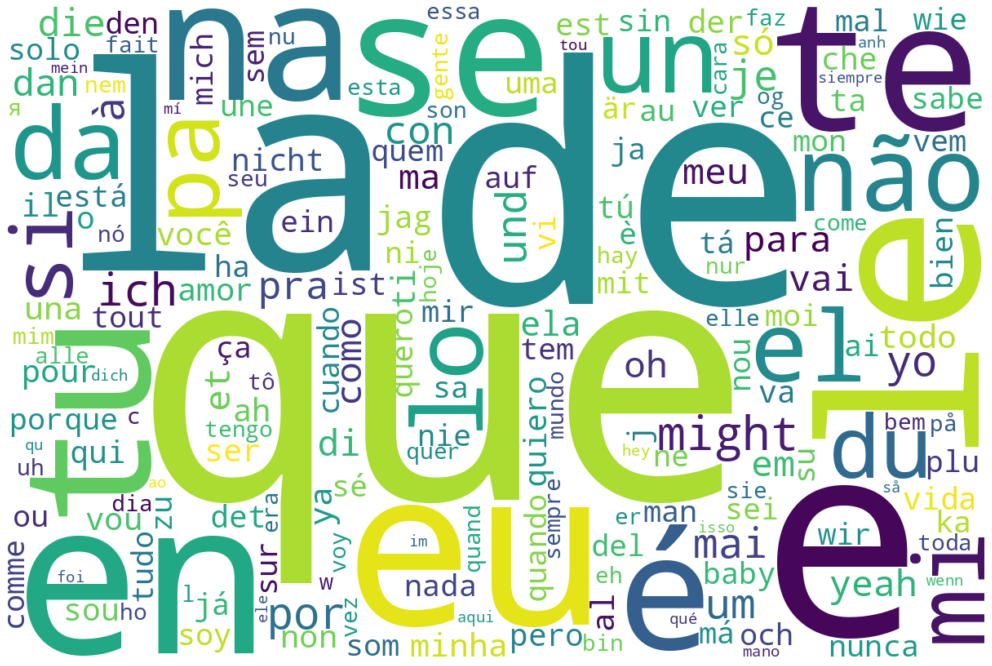

In [314]:
all_words = ' '.join(other['processed_lyrics'])
wordcloud = WordCloud(width=1200, height=800, background_color='white', collocations=False).generate(all_words)
plt.figure(figsize=(20, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud_other.png')
plt.show()

### 6. Unique Word Analysis

/tmp/ipykernel_1802220/1326449155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other['unique_words'] = other['lyrics_other'].apply(lambda x: len(set(x)))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


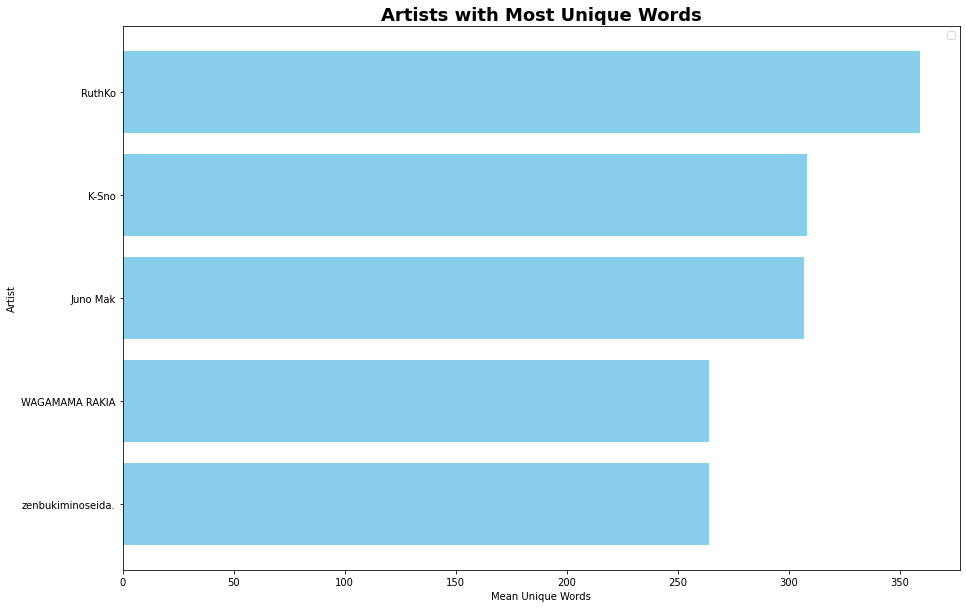

In [324]:
other['unique_words'] = other['lyrics_other'].apply(lambda x: len(set(x)))
other_exp = other.copy()
other_exp['artist'] = other_exp['track_artists_names'].str.split(':artist_custom_separator:')
other_exp = other_exp.explode('artist')

unique_words_by_artist = other_exp.groupby('artist')['unique_words'].mean()

sorted_unique_words = unique_words_by_artist.sort_values(ascending=False)

plt.figure(figsize=(15, 10))

top_artists = sorted_unique_words.head(5)
plt.barh(top_artists.index, top_artists.values, color='skyblue')

plt.xlabel('Mean Unique Words')
plt.ylabel('Artist')
plt.title('Artists with Most Unique Words', fontsize=18, fontweight='bold')
plt.legend()
plt.gca().invert_yaxis()
plt.savefig('most_unique_other.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


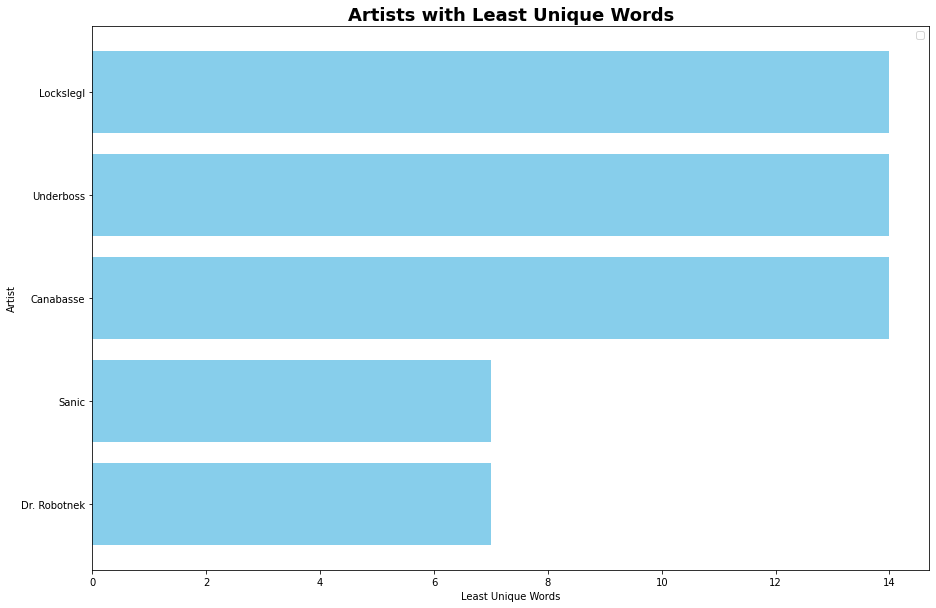

In [325]:
plt.figure(figsize=(15, 10))

bot_artists = sorted_unique_words[sorted_unique_words > 0].tail(5)
plt.barh(bot_artists.index, bot_artists.values, color='skyblue')

plt.xlabel('Least Unique Words')
plt.ylabel('Artist')
plt.title('Artists with Least Unique Words', fontsize=18, fontweight='bold')
plt.legend()
plt.gca().invert_yaxis()
plt.savefig('least_unique_words_other.png')
plt.show()